In [2]:
#!git clone https://github.com/kumarvivek9088/aslsigndataset.git

In [3]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
import os

In [4]:
'''import tensorflow as tf
tf.config.run_functions_eagerly(True)

tf.data.experimental.enable_debug_mode()'''

'import tensorflow as tf\ntf.config.run_functions_eagerly(True)\n\ntf.data.experimental.enable_debug_mode()'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128


train_generator = train_datagen.flow_from_directory(
    "/home/sandy/Desktop/Study/BE Project/Implementation/Final/PROJECT COPY FOR MEMBERS/preprocessed_FINAL/train",
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    "C:/Users/Sylvia/Documents/college stuff/sem 7/final year project stuff/SignLanguageDetectionUsingCNN-main/preprocessed_FINAL/val",
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=True
)

Found 33235 images belonging to 26 classes.
Found 8325 images belonging to 26 classes.


In [7]:
list(validation_generator.class_indices.keys())

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [8]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [9]:
model = Sequential()
# convolutional layers
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

'''model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Dropout(0.4))'''

model.add(Flatten())
# fully connected layers
model.add(Dense(256, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
'''
model.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
'''
# output layer
model.add(Dense(26, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [11]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
#!rm -r Logs
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [13]:
logdir = os.path.join("Logs1")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [ ]:
print("Training started...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size,
    callbacks=[tensorboard_callback]
)
print("Training completed.")

Training started...
Epoch 1/20


2024-05-01 16:09:54.673262: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 260112384 exceeds 10% of free system memory.
2024-05-01 16:09:56.416055: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121929728 exceeds 10% of free system memory.
2024-05-01 16:09:57.844480: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 121929728 exceeds 10% of free system memory.
2024-05-01 16:09:58.322173: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 130056192 exceeds 10% of free system memory.
2024-05-01 16:09:58.322303: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 260112384 exceeds 10% of free system memory.


259/259 [==============================] - 742s 3s/step - loss: 1.9222 - accuracy: 0.4288 - val_loss: 0.5158 - val_accuracy: 0.8718
Epoch 2/20
259/259 [==============================] - 499s 2s/step - loss: 0.6463 - accuracy: 0.7931 - val_loss: 0.1992 - val_accuracy: 0.9483
Epoch 3/20
 31/259 [==>...........................] - ETA: 6:50 - loss: 0.4342 - accuracy: 0.8588

In [118]:
#model.history
print(model.history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [119]:
#%reload_ext tensorboard
import pandas as pd
metrics = pd.DataFrame(model.history.history)
#print("The model metrics are")
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.993286,0.404476,0.550573,0.864904
1,0.694195,0.779624,0.230072,0.943029
2,0.405749,0.869423,0.125915,0.968990
3,0.292216,0.907452,0.082237,0.977644
4,0.231666,0.927568,0.068719,0.980168
5,0.192484,0.938714,0.054955,0.985457
6,0.166292,0.946295,0.041459,0.987500
7,0.142889,0.955115,0.036048,0.989183
8,0.125761,0.959465,0.034157,0.989543
9,0.109125,0.965143,0.026652,0.992668


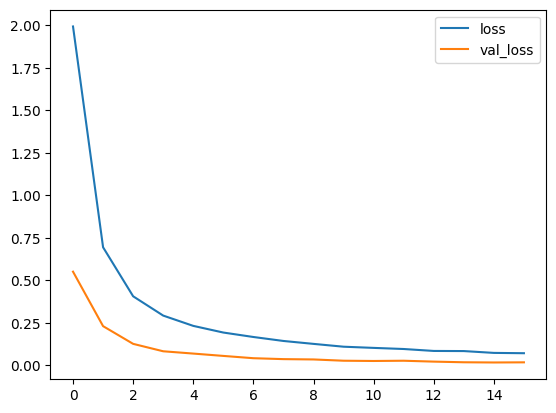

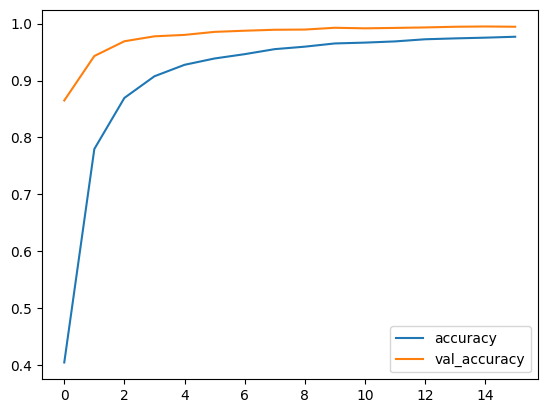

In [120]:
metrics[['loss','val_loss']].plot()
plt.show()

metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [121]:
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

testing_data = test_datagen.flow_from_directory(
    "C:/Users/Sylvia/Documents/college stuff/sem 7/final year project stuff/SignLanguageDetectionUsingCNN-main/preprocessed_all_manpreet/val",
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
    
)

Found 2635 images belonging to 26 classes.


In [122]:
#from sklearn.metrics import accuracy_score
print(list(testing_data.class_indices.keys()))


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


21/21 [==============================] - 6s 225ms/step


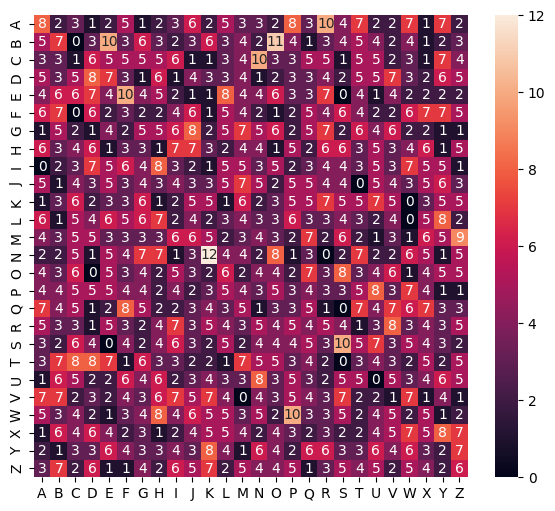

Classification Report
              precision    recall  f1-score   support

           0       0.08      0.08      0.08       101
           1       0.07      0.07      0.07       101
           2       0.01      0.01      0.01       102
           3       0.08      0.08      0.08       101
           4       0.04      0.04      0.04       102
           5       0.03      0.03      0.03       101
           6       0.05      0.05      0.05       102
           7       0.01      0.01      0.01       101
           8       0.03      0.03      0.03       101
           9       0.03      0.03      0.03       101
          10       0.05      0.05      0.05       101
          11       0.03      0.03      0.03       101
          12       0.03      0.03      0.03       102
          13       0.02      0.02      0.02       101
          14       0.04      0.04      0.04       101
          15       0.03      0.03      0.03       101
          16       0.05      0.05      0.05       101
     

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False,xticklabels=class_names,yticklabels=class_names)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(testing_data.classes, y_pred))

Y_pred = model.predict(testing_data)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(testing_data.classes, y_pred)


21/21 [==============================] - 4s 187ms/step


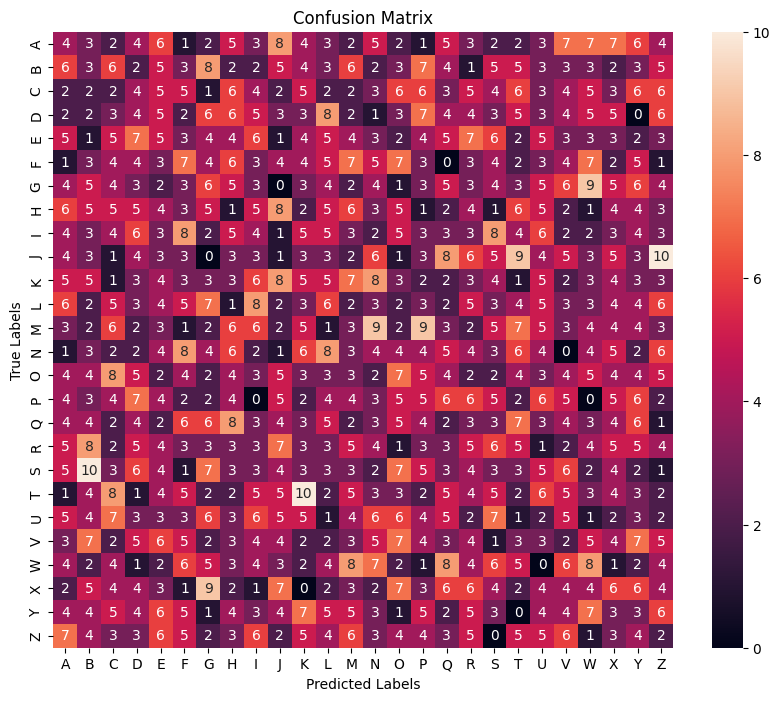

In [124]:
validation_labels = testing_data.classes
predictions = model.predict(testing_data)
predicted_labels = np.argmax(predictions, axis=1)
#true_labels = np.argmax(predicted_labels,axis=1)
# Compute confusion matrix
conf_matrix = confusion_matrix(validation_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=True,xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##accuracy = metrics.val_accuracy


In [125]:
#print(list(testing_data.class_indices).shape)
print(predicted_labels)

print(validation_labels)

[10  9 15 ... 17  2 15]
[ 0  0  0 ... 25 25 25]


In [132]:
loss,accuracy=model.evaluate(validation_generator)
print(f'Test Loss: {loss*100}, Test Accuracy: {accuracy*100}')

66/66 [==============================] - 19s 267ms/step - loss: 0.0180 - accuracy: 0.9950
Test Loss: 1.802150160074234, Test Accuracy: 99.49549436569214


In [126]:
loss,accuracy=model.evaluate(testing_data)
print(f'Test Loss: {loss*100}, Test Accuracy: {accuracy*100}')

21/21 [==============================] - 4s 193ms/step - loss: 0.0012 - accuracy: 0.9996
Test Loss: 0.12135505676269531, Test Accuracy: 99.96204972267151


In [127]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
#predictions = model.predict(test_data)

# Convert predictions to class labels
#predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy for each class
class_accuracy = {}
for class_idx in range(26):
    true_indices = np.where(validation_labels == class_idx)[0]
    predicted_indices = np.where(predicted_labels == class_idx)[0]
    class_accuracy[class_idx] = len(set(true_indices) & set(predicted_indices)) / len(true_indices)

# Print class-wise accuracy
for class_idx, accuracy in class_accuracy.items():
    print(f"Class {class_idx}: Accuracy = {accuracy:.2f}")


Class 0: Accuracy = 0.04
Class 1: Accuracy = 0.03
Class 2: Accuracy = 0.02
Class 3: Accuracy = 0.04
Class 4: Accuracy = 0.05
Class 5: Accuracy = 0.07
Class 6: Accuracy = 0.06
Class 7: Accuracy = 0.01
Class 8: Accuracy = 0.04
Class 9: Accuracy = 0.01
Class 10: Accuracy = 0.05
Class 11: Accuracy = 0.06
Class 12: Accuracy = 0.03
Class 13: Accuracy = 0.04
Class 14: Accuracy = 0.07
Class 15: Accuracy = 0.05
Class 16: Accuracy = 0.02
Class 17: Accuracy = 0.05
Class 18: Accuracy = 0.03
Class 19: Accuracy = 0.02
Class 20: Accuracy = 0.02
Class 21: Accuracy = 0.02
Class 22: Accuracy = 0.08
Class 23: Accuracy = 0.06
Class 24: Accuracy = 0.03
Class 25: Accuracy = 0.02


In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_true contains the true labels and y_pred contains the predicted labels
# y_true and y_pred should be numpy arrays or lists

# Accuracy
accuracy = accuracy_score(validation_labels, predicted_labels)

# Precision
precision = precision_score(validation_labels, predicted_labels, average='weighted')

# Recall
recall = recall_score(validation_labels, predicted_labels, average='weighted')

# F1 score
f1 = f1_score(validation_labels, predicted_labels, average='weighted')

# Confusion matrix
#conf_matrix = confusion_matrix(validation_labels, predicted_classes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
#print("Confusion Matrix:")
#print(conf_matrix)

Accuracy: 0.03870967741935484
Precision: 0.038713799715853384
Recall: 0.03870967741935484
F1 Score: 0.03871163810487434


In [54]:
#print(list(model.history.history.keys()))


[]


In [24]:
# Access training history
'''train_loss = model.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot loss curves
plt.figure()
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()'''

"train_loss = model.history['loss']\nval_loss = model.history.history['val_loss']\ntrain_acc = model.history.history['accuracy']\nval_acc = model.history.history['val_accuracy']\nepochs = range(1, len(train_loss) + 1)\n\n# Plot loss curves\nplt.figure()\nplt.plot(epochs, train_loss, 'b', label='Training loss')\nplt.plot(epochs, val_loss, 'r', label='Validation loss')\nplt.title('Training and validation loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()\n\n# Plot accuracy curves\nplt.figure()\nplt.plot(epochs, train_acc, 'b', label='Training accuracy')\nplt.plot(epochs, val_acc, 'r', label='Validation accuracy')\nplt.title('Training and validation accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()"

In [129]:
validation_labels.shape

(2635,)

In [130]:
#true_labels = validation_labels.tolist()
type(validation_labels)

numpy.ndarray

In [131]:
model_json = model.to_json()
with open("C:/Users/Sylvia/Documents/college stuff/sem 7/final year project stuff/SignLanguageDetectionUsingCNN-main/sign_all_final.json",'w') as json_file:
    json_file.write(model_json)
model.save("C:/Users/Sylvia/Documents/college stuff/sem 7/final year project stuff/SignLanguageDetectionUsingCNN-main/sign_all_final.h5")

C:\Users\Sylvia\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
